In [6]:
#this is to learn and simulate 
#E and I neurons mixed randomly 
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd


torch.manual_seed(42)


n=6
tao=100
dt = 1e-4
T=int(10/dt)
B=10
w=torch.randn(n,n, device='cpu', requires_grad=True,dtype=torch.float)
lr = 1e-1
n_epochs = 100

optimizer = optim.Adam([w], lr=lr)
V=torch.zeros(T,n)
ep=np.arange(n_epochs)
Loss=torch.zeros(n_epochs,)
Wmean=torch.zeros(n_epochs,)
#P=(np.absolute(np.random.randint(low=1, high=100, size=math.ceil(n/2))))
P=np.array([50,20,10])
for epoch in range(n_epochs):
    print (epoch)
    #generate a panda dataframe consists the values and class E of the neuron, assign 1 to the data 
    ze = pd.DataFrame({'Value': torch.from_numpy(np.absolute(np.array(np.random.normal(0, 1, math.ceil(n/2))))),
                    'Type': 'E',
                    'sign': np.array([1] * math.ceil(n/2), dtype='int32'),
                   'penalty':torch.from_numpy(P)
                    })  
     #generate a panda dataframe consists the values and class I of the neuron, assign -1 to the data 
    zi = pd.DataFrame({'Value': torch.from_numpy(-np.absolute(np.array(np.random.normal(0, 1, round(n/2))))),
                    'Type': 'I',
                    'sign': np.array([-1] * round(n/2), dtype='int32'),
                   'penalty':torch.from_numpy((np.array([1] * round(n/2))))
                   })   
    #join E neurons and I neuronns 
    zf = pd.concat([ze, zi])
    #mix the joint population 
    zd = zf.sample(frac=1).reset_index(drop=True)
    #convert the panda dataframe to a tensor 
    z=torch.zeros(1,n)
    #p=torch.zeros(1,n)
    p=np.zeros(n)
    for d in range(n):
        z[:,d]=(zd.loc[d,'Value'])
        p[e]=(zd.loc[e,'penalty'])        
    
    
    #create a new tensor to prevent the leaf variable go into the learning process  
    p2=torch.from_numpy(p)
    p3=torch.diag(p2)
    p1=p3.type(dtype=torch.float)
    print (p1)
    wi=torch.randn(n,n)
    for i in range(n):
        for j in range(n):
            #print (z.loc[j,'sign'])
            #print (w[i,j])
            wi[i,j]=(zd.loc[j,'sign'])*w[i,j]
            #print (w[i,j])
    
    w1=torch.diag(wi)
    w_rec=torch.diag(w1)
    w1_rec = wi-w_rec
    print (w1_rec)
    
    loss=0
    for t in range(T):
        N=torch.randn(1,n)
        z_dot=(-z+(z@w1_rec)/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
        loss = loss + ((z@p1)**2).mean()
    
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    Loss[epoch]=loss
   
 













0
tensor([[ 1.4213, -0.9358,  2.0860,  0.4001, -0.2723, -0.1044]])
tensor([[20.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 50.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]])
tensor([[ 0.0000, -1.4873,  0.9007, -2.1055, -0.6784,  1.2345],
        [-0.0431,  0.0000, -0.7521,  1.6487,  0.3925,  1.4036],
        [-0.7279,  0.5594,  0.0000,  0.7624, -1.6423,  0.1596],
        [-0.4974, -0.4396,  0.3189,  0.0000, -0.3057,  0.7746],
        [ 0.0349, -0.3211,  1.5736, -0.8455,  0.0000, -2.1228],
        [-1.2347,  0.4879, -1.4181,  0.8963, -0.0499,  0.0000]],
       grad_fn=<SubBackward0>)
1
tensor([[-0.4597, -0.2016,  0.3710, -1.2810,  1.3066,  0.2153]])
tensor([[ 1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 50.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 10.,  0.],
        [

12
tensor([[-0.4979, -0.5807, -0.6008,  0.9443,  0.0971,  0.9758]])
tensor([[ 1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 20.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 50.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 10.]])
tensor([[ 0.0000, -1.0320, -0.7831, -1.2531,  1.2236, -0.9792],
        [-0.2584,  0.0000,  0.1074,  1.0838, -0.2282, -0.7457],
        [ 0.6362,  0.6330,  0.0000,  0.8909,  1.3198, -0.6466],
        [ 0.4261, -0.3842, -0.3258,  0.0000, -0.1877, -0.4356],
        [ 0.0334, -0.1109, -0.8703, -0.4180,  0.0000,  1.3761],
        [ 0.5483,  0.3269,  0.8385,  0.8284,  0.3154,  0.0000]],
       grad_fn=<SubBackward0>)
13
tensor([[-1.2330,  0.0659, -0.3729,  0.8045, -0.6008,  0.8123]])
tensor([[ 1.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
       

24
tensor([[-1.8263, -0.6176, -0.3264,  0.0105,  1.1772,  0.3686]])
tensor([[ 1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 20.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 50.]])
tensor([[ 0.0000, -0.4841, -0.7375, -0.7651,  1.0515, -1.0478],
        [-0.6644,  0.0000, -0.0542,  0.6242,  0.0279, -0.2387],
        [-0.0031,  0.2567,  0.0000,  0.4619,  1.1676, -0.5387],
        [ 0.1321, -0.5711, -0.5572,  0.0000, -0.0584, -0.0618],
        [ 0.4062, -0.1074, -0.5198,  0.0042,  0.0000,  0.8325],
        [ 0.1373,  0.2316,  0.6117,  0.4641,  0.5467,  0.0000]],
       grad_fn=<SubBackward0>)
25
tensor([[-0.7587,  1.7421, -0.1354,  0.2081, -2.2093,  0.9121]])
tensor([[ 1.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 50.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
       

36
tensor([[-0.0813,  1.0336, -1.2932,  0.9989,  0.1520, -1.2239]])
tensor([[ 1.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 50.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 20.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]])
tensor([[ 0.0000,  0.1825, -0.6437, -0.5843,  0.9080,  1.2071],
        [-0.8417,  0.0000, -0.0530,  0.3542,  0.0858,  0.0176],
        [-0.2550, -0.0388,  0.0000,  0.1407,  1.0728,  0.4559],
        [-0.0151,  0.5444, -0.5674,  0.0000, -0.0076, -0.0374],
        [ 0.5685,  0.0542, -0.4492,  0.1314,  0.0000, -0.6193],
        [-0.0497, -0.1185,  0.5231,  0.1173,  0.5617,  0.0000]],
       grad_fn=<SubBackward0>)
37
tensor([[ 0.1391, -0.8403,  0.3257, -0.4249, -0.7708,  1.5531]])
tensor([[10.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 20.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
       

48
tensor([[ 0.8461, -0.1473,  0.0971, -0.9597, -1.3852,  0.3811]])
tensor([[10.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 50.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 20.]])
tensor([[ 0.0000, -0.2973,  0.5851,  0.4796, -0.7139, -1.1069],
        [ 0.7856,  0.0000,  0.0814, -0.2595,  0.0736,  0.0559],
        [ 0.3113, -0.0244,  0.0000, -0.0474, -0.9002, -0.3513],
        [ 0.1166, -0.2494,  0.6211,  0.0000, -0.0563, -0.0679],
        [-0.5851, -0.0806,  0.4911, -0.1866,  0.0000,  0.3784],
        [-0.0697,  0.0359, -0.4592,  0.0930, -0.4634,  0.0000]],
       grad_fn=<SubBackward0>)
49
tensor([[-1.9354,  0.2222,  0.4053, -1.6968, -0.9510,  0.7080]])
tensor([[ 1.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 50.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
       

60
tensor([[-1.4460,  0.7366, -1.4101,  0.4512, -0.7425,  0.7279]])
tensor([[ 1.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 50.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 20.]])
tensor([[ 0.0000,  0.4598, -0.4171, -0.2658, -0.5630, -0.8160],
        [-0.7212,  0.0000, -0.0854,  0.3734,  0.1863,  0.1490],
        [-0.2501,  0.0834,  0.0000,  0.0135, -0.8572, -0.2176],
        [-0.1288,  0.1758, -0.5697,  0.0000, -0.0202, -0.1758],
        [ 0.4814,  0.1090, -0.5333,  0.2606,  0.0000,  0.2324],
        [ 0.2605, -0.0157,  0.4179, -0.1669, -0.3978,  0.0000]],
       grad_fn=<SubBackward0>)
61
tensor([[ 0.4729, -0.6018,  0.1115,  1.0287, -1.3540, -1.4453]])
tensor([[20.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 50.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
       

71
tensor([[-0.3485,  0.7210,  1.7935, -1.2937,  0.9458, -0.5871]])
tensor([[ 1.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 50.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 20.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]])
tensor([[ 0.0000,  0.3660,  0.3589,  0.0747,  0.4558,  0.4989],
        [-0.7206,  0.0000,  0.0225, -0.3749, -0.2550, -0.0407],
        [-0.1025,  0.1513,  0.0000,  0.0941,  0.8597,  0.0645],
        [-0.0496,  0.2920,  0.5691,  0.0000, -0.0022,  0.2411],
        [ 0.3758,  0.0405,  0.5200, -0.3409,  0.0000, -0.2412],
        [ 0.4099,  0.0744, -0.3255,  0.2333,  0.3625,  0.0000]],
       grad_fn=<SubBackward0>)
72
tensor([[ 0.7011, -1.7536,  1.7506, -0.1027, -1.0036,  0.1112]])
tensor([[10.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 20.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
       

82
tensor([[-0.7438,  0.2242,  0.6460,  0.5392, -2.0847, -0.2981]])
tensor([[ 1.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 10.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 50.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 20.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]])
tensor([[ 0.0000,  0.1092,  0.3660, -0.1172, -0.4999,  0.2879],
        [-0.6355,  0.0000,  0.0503,  0.2015,  0.2041,  0.2696],
        [ 0.0378,  0.2598,  0.0000, -0.0552, -0.8112, -0.1944],
        [ 0.0298,  0.2585,  0.4965,  0.0000, -0.0024,  0.1210],
        [ 0.3775, -0.0484,  0.4669,  0.2680,  0.0000, -0.3326],
        [ 0.3646,  0.1506, -0.2310, -0.2450, -0.4264,  0.0000]],
       grad_fn=<SubBackward0>)
83
tensor([[-0.1882, -1.5604,  0.9518,  0.2002, -0.1887,  0.8804]])
tensor([[ 1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 20.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 50.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.],
       

94
tensor([[-0.3348,  0.1596,  0.5248, -0.8707,  1.1715, -0.8344]])
tensor([[ 1.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 10.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 20.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 50.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]])
tensor([[ 0.0000,  0.0098,  0.2594,  0.1981,  0.6055,  0.2800],
        [-0.6044,  0.0000,  0.0175, -0.0405, -0.1638,  0.3411],
        [ 0.1769,  0.2661,  0.0000,  0.1633,  0.8427, -0.3666],
        [-0.0242,  0.0962,  0.2261,  0.0000,  0.0631,  0.0827],
        [ 0.2660, -0.1766,  0.4261, -0.0744,  0.0000, -0.2633],
        [ 0.1315,  0.2154, -0.1541,  0.2467,  0.4098,  0.0000]],
       grad_fn=<SubBackward0>)
95
tensor([[ 0.1478,  1.8579, -0.5939, -0.8660,  0.6082, -0.2047]])
tensor([[10.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 50.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 20.,  0.],
       

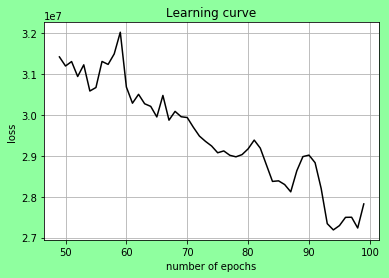

In [10]:
#this is to plot the graph 
fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.title('Learning curve')
df=pd.DataFrame(Loss.detach().numpy())
rolling_mean = df.rolling(window=50).mean()
plt.plot(ep, rolling_mean, label='Learning Curve', color='k')
plt.grid(True)
plt.show()

0
tensor([ 1.1284,  0.3792,  1.8878, -0.6107, -0.0738, -0.9277])
1
tensor([ 2.7219,  2.0024,  0.9695, -0.3387, -1.0788, -0.0732])
2
tensor([ 0.2856,  0.0740,  0.3217, -0.5727, -0.8471, -0.5088])
3
tensor([ 0.4501,  0.1181,  2.0602, -0.2805, -1.4058, -1.3236])
4
tensor([ 0.6407,  1.3741,  1.0238, -0.4060, -0.3386, -0.8964])
5
tensor([ 0.6670,  1.1786,  0.0584, -0.8967, -0.4819, -0.5378])
6
tensor([ 0.1672,  0.8577,  1.7054, -0.0998, -0.5367, -0.3212])
7
tensor([ 1.9293,  0.8097,  0.9658, -1.5582, -0.0723, -0.5205])


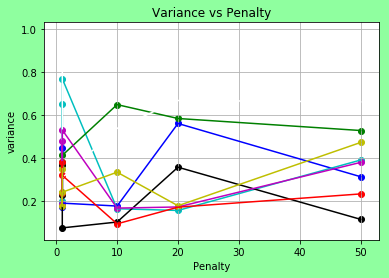

tensor([50, 20, 10,  1,  1,  1])


In [9]:





fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.ylabel('variance')
plt.xlabel('Penalty')
plt.title('Variance vs Penalty')
plt.grid(True)
color=['b','c','k','g','w','m','r','y']
for a in range(8):
    print (a)
    #generate a panda dataframe consists the values and class E of the neuron, assign 1 to the data 
    ze = pd.DataFrame({'Value': torch.from_numpy(np.absolute(np.array(np.random.normal(0, 1, math.ceil(n/2))))),
                    'Type': 'E',
                    'sign': np.array([1] * math.ceil(n/2), dtype='int32')})  
     #generate a panda dataframe consists the values and class I of the neuron, assign -1 to the data 
    zi = pd.DataFrame({'Value': torch.from_numpy(-np.absolute(np.array(np.random.normal(0, 1, round(n/2))))),
                    'Type': 'I',
                    'sign': np.array([-1] * round(n/2), dtype='int32')})   
    #join E neurons and I neuronns 
    zf = pd.concat([ze, zi]).reset_index(drop=True)
    #mix the joint population 
    #zd = zf.sample(frac=1).reset_index(drop=True)
    #convert the panda dataframe to a tensor 
    #print (ze,zi,zf,zd)
    z1=np.zeros(n)
  
    for m in range(n):
        z1[m]=(zf.loc[m,'Value'])
        

    z2=torch.from_numpy(z1)
    z=z2.type(dtype=torch.float)
        

    Z=torch.zeros(T,n)
    print (z)
   
    
    for t in range(T):
        N=torch.randn(1,n)
        z_dot=(-z+(z@w1_rec)/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
        Z[t] = z
        Z_split = torch.split(Z,int(T/2),dim=0)[1]
        
    V=torch.zeros(n,1)
    P1=torch.from_numpy(np.append(P,[1,1,1]))

    for i in range(n):
        V[i]=torch.var(Z_split[:,i])  
        
    plt.scatter(P1,V.detach().numpy(),color=color[a])   
    plt.plot(P1.detach().numpy(),V.detach().numpy(),color=color[a]) 
    
plt.show() 
print (P1)





In [ ]:
print (z)